### Import Dependencies

In [41]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## Input Dataset

In [42]:
df = pd.read_csv('flower.csv')

## Data Exploration

### Check data rows

In [43]:
y = df['Species']
df.head(10)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Id
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,2
2,4.7,3.2,1.3,0.2,0,3
3,4.6,3.1,1.5,0.2,0,4
4,5.0,3.6,1.4,0.2,0,5
5,5.4,3.9,1.7,0.4,0,6
6,4.6,3.4,1.4,0.3,0,7
7,5.0,3.4,1.5,0.2,0,8
8,4.4,2.9,1.4,0.2,0,9
9,4.9,3.1,1.5,0.1,0,10


### Describe data

In [44]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Id
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000,75.500000
std,0.828066,0.433594,1.764420,0.763161,0.819232,43.445368
min,4.300000,2.000000,1.000000,0.100000,0.000000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,38.250000
50%,5.800000,3.000000,4.350000,1.300000,1.000000,75.500000
75%,6.400000,3.300000,5.100000,1.800000,2.000000,112.750000
max,7.900000,4.400000,6.900000,2.500000,2.000000,150.000000


<Axes: xlabel='Species', ylabel='count'>

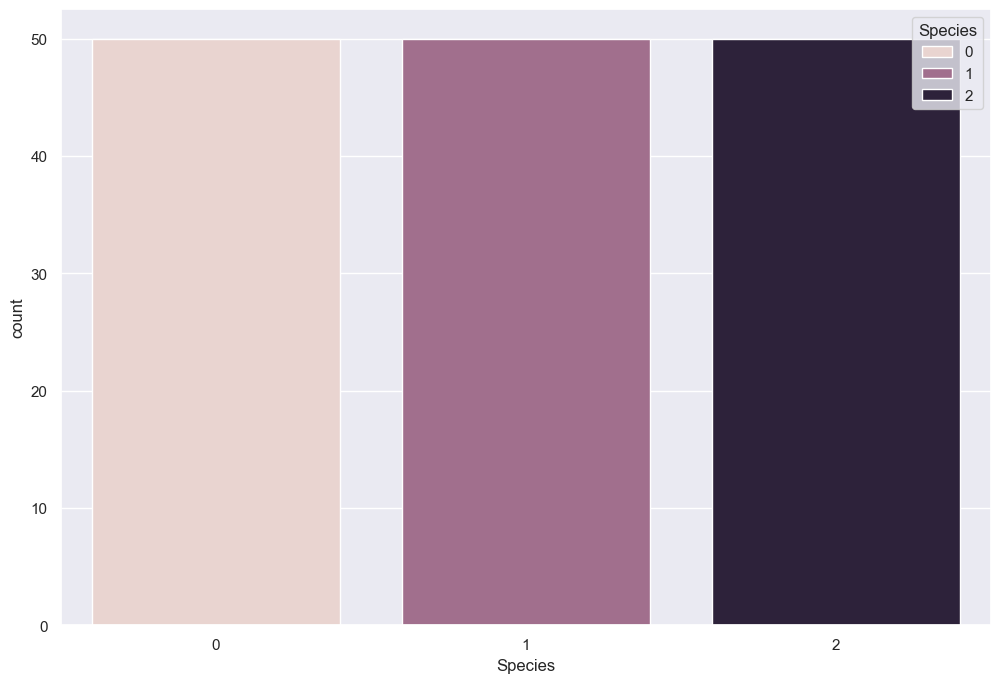

In [45]:
sns.countplot (x='Species', data=df, hue="Species")

## Boxplot of the species to find the outliers if any

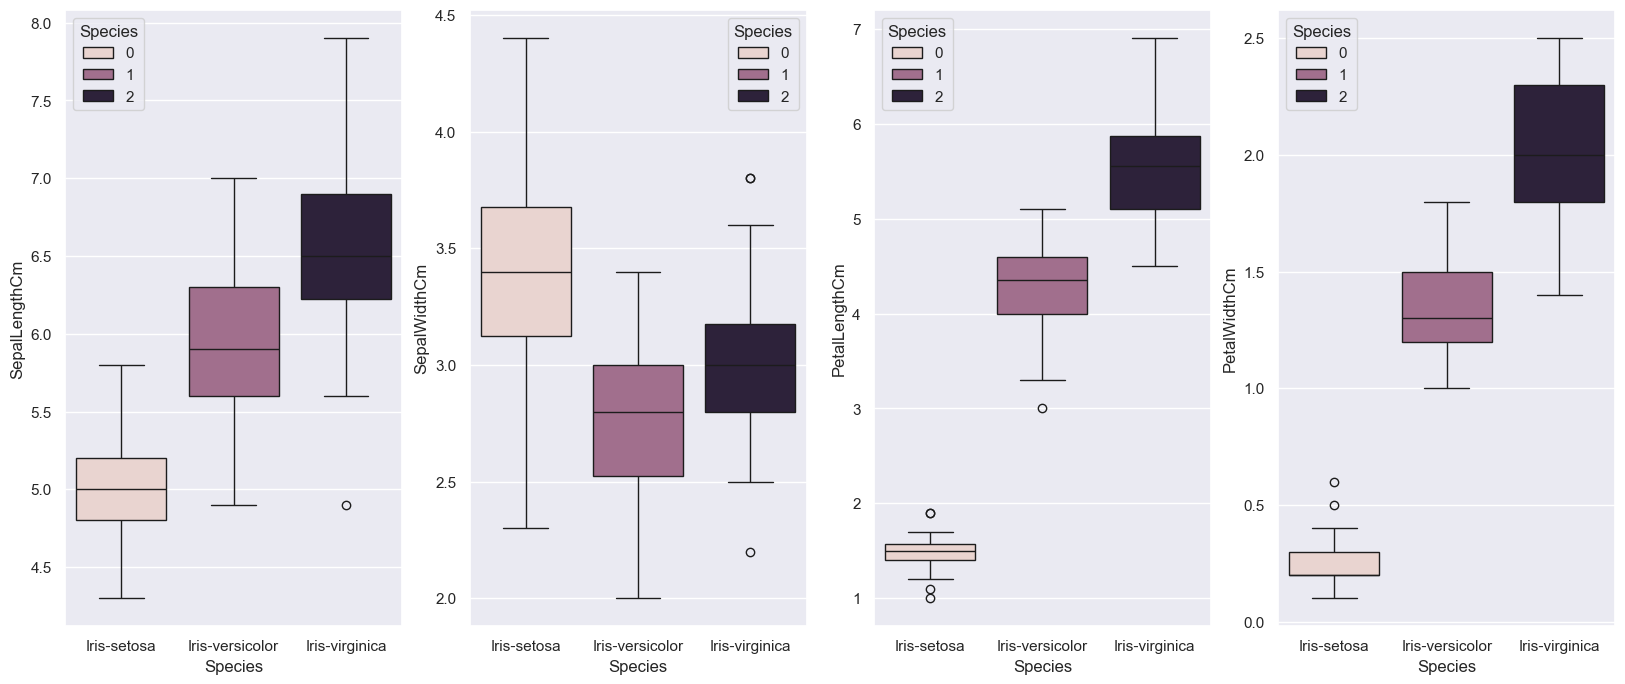

In [46]:
plt.figure(1,figsize=(20,8))
plt.subplot(141)
sns.boxplot(x='Species',y='SepalLengthCm',data=df, hue='Species')
plt.xticks(ticks=[0, 1, 2], labels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
plt.subplot(142)
sns.boxplot(x='Species',y='SepalWidthCm',data=df, hue='Species')
plt.xticks(ticks=[0, 1, 2], labels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
plt.subplot(143)
sns.boxplot(x='Species',y='PetalLengthCm',data=df, hue='Species')
plt.xticks(ticks=[0, 1, 2], labels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
plt.subplot(144)
sns.boxplot(x='Species',y='PetalWidthCm',data=df, hue='Species')
plt.xticks(ticks=[0, 1, 2], labels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"])

plt.show()



## Plotting of the Correlation Matrix

In [47]:
df.corr(numeric_only=True)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Id
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561,0.716676
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446,-0.397729
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043,0.882747
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464,0.899759
Species,0.782561,-0.419446,0.949043,0.956464,1.000000,0.942830
Id,0.716676,-0.397729,0.882747,0.899759,0.942830,1.000000


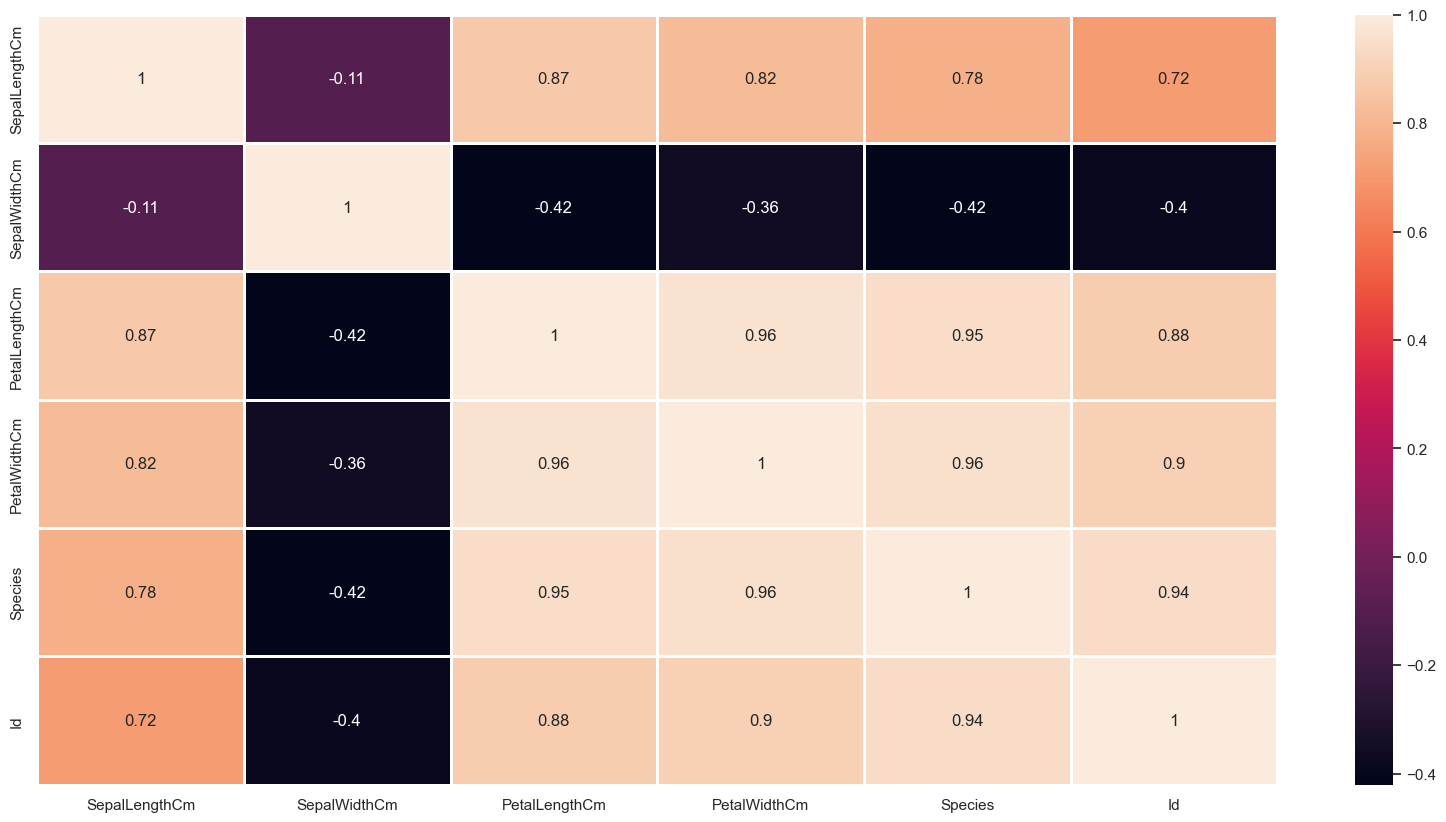

In [48]:
plt.figure(1,figsize=(20,10))
sns.color_palette("magma", as_cmap=True)
sns.heatmap(df.corr(numeric_only=True),annot=True, linewidth=0.8)
plt.show()

In [49]:
df.corr(numeric_only=True)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Id
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561,0.716676
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446,-0.397729
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043,0.882747
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464,0.899759
Species,0.782561,-0.419446,0.949043,0.956464,1.000000,0.942830
Id,0.716676,-0.397729,0.882747,0.899759,0.942830,1.000000


# Correlation Analysis Using Pair Plot

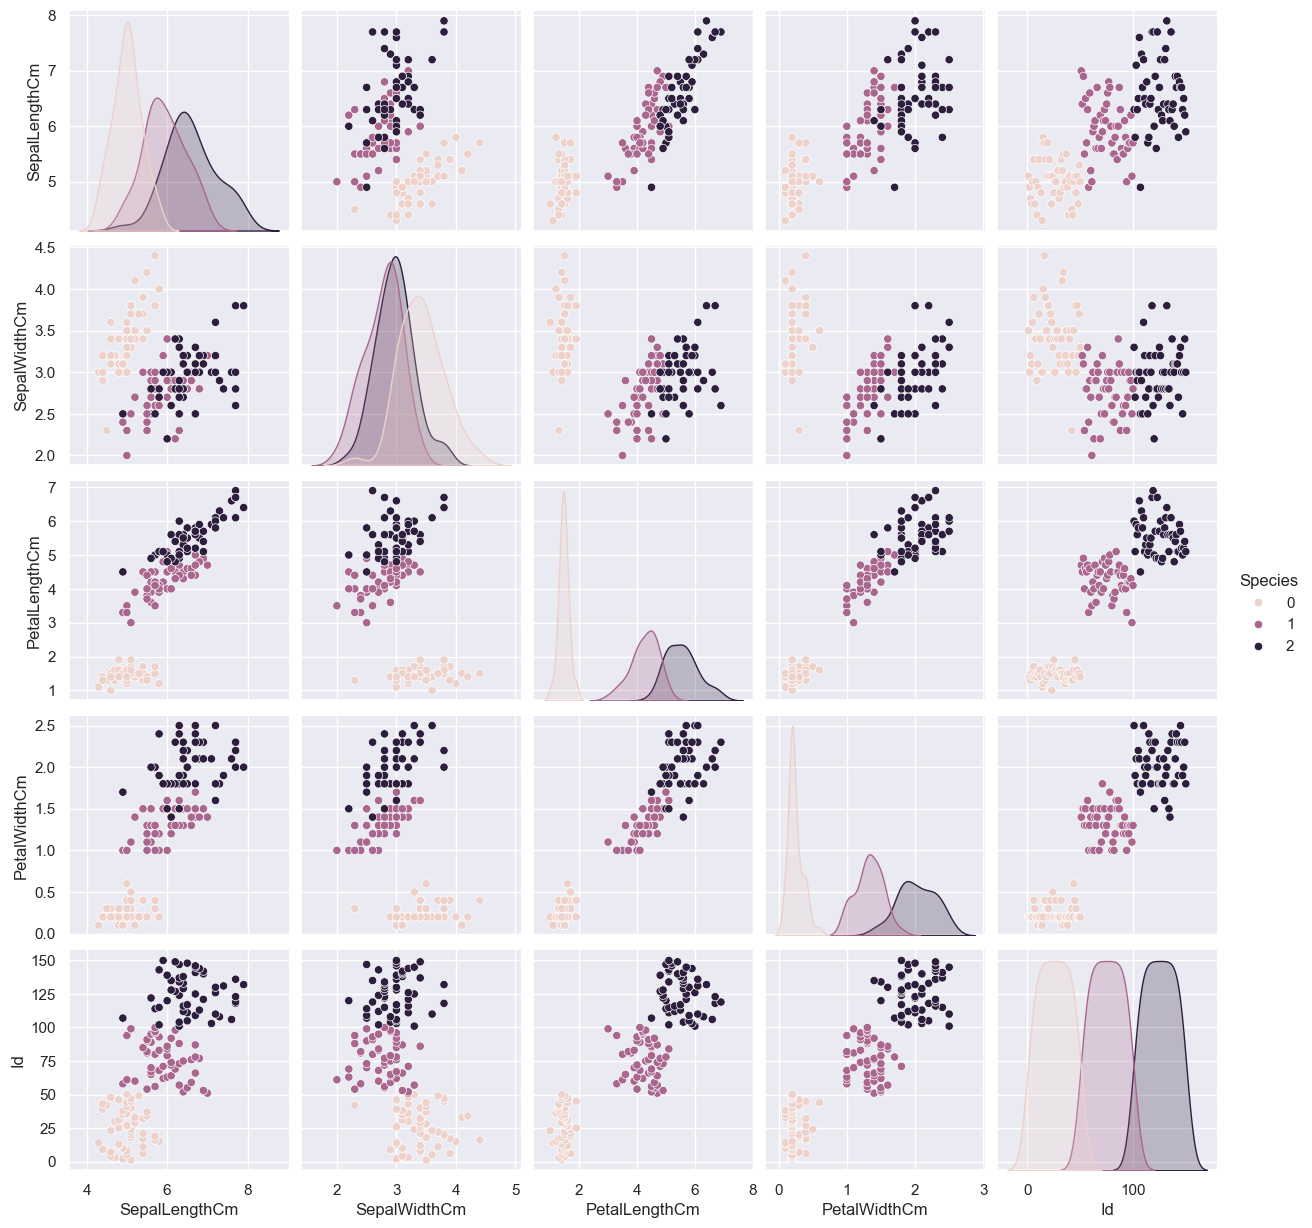

In [50]:
sns.pairplot(df, hue='Species')
plt.show ()

In [51]:
X = df.iloc[:,0:7]
target = df['Species'].to_numpy()
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns

observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species', 'Id']


## PCA Plotting

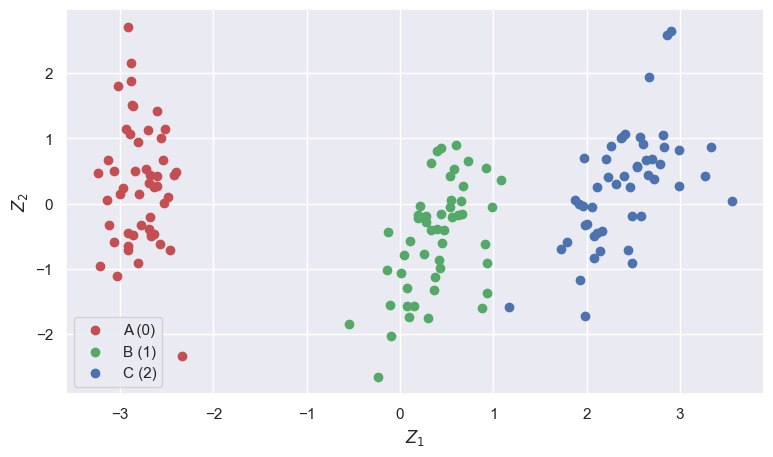

In [52]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

# 1(A)->0,  2(P)->1, 3(C)->2
idx_A = np.where(y == 0)
idx_B = np.where(y == 1)
idx_C = np.where(y == 2)

plt.figure(1, figsize=(9,5))
plt.scatter(Z[idx_A,0], Z[idx_A,1], c='r', label='A (0)')
plt.scatter(Z[idx_B,0], Z[idx_B,1], c='g', label='B (1)')
plt.scatter(Z[idx_C,0], Z[idx_C,1], c='b', label='C (2)')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

labels = ['red' if i==1 else 'green' for i in df.Species]


# Eigenvector Matrix

In [53]:
A = pca.components_.T
print(f'Eigenvector matrix:\n{A}')



Eigenvector matrix:
[[ 0.39430051  0.38549168  0.68507478 -0.39557776  0.00772179  0.26467797]
 [-0.20560332  0.91872993 -0.29963196  0.09335891  0.03603068 -0.11776749]
 [ 0.45500577  0.03322082  0.19285024  0.26650247 -0.03723742 -0.82599317]
 [ 0.44991885  0.07575441 -0.11781675  0.60287127 -0.47082195  0.43912008]
 [ 0.45238061 -0.00712407 -0.27056797  0.11597434  0.82097079  0.18614759]
 [ 0.43376139 -0.02093743 -0.56268481 -0.62199274 -0.31873061 -0.07958833]]


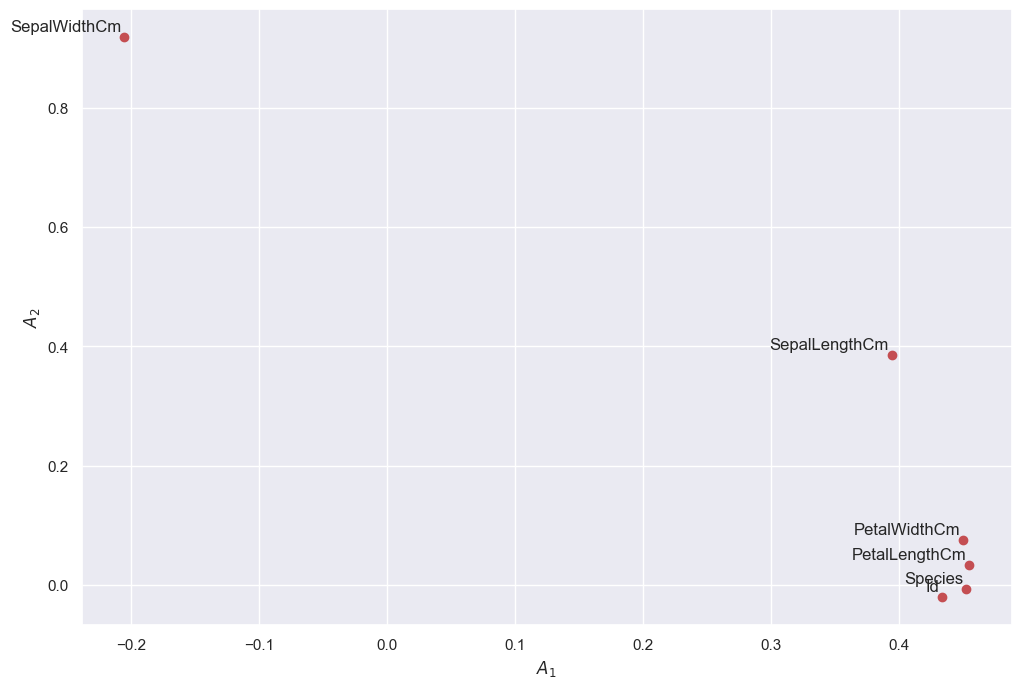

In [54]:
plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

# Eigen Values & Scree Plot

Eigenvalues:
[4.71398496 0.92800811 0.256567   0.08997135 0.03154858 0.02018845]


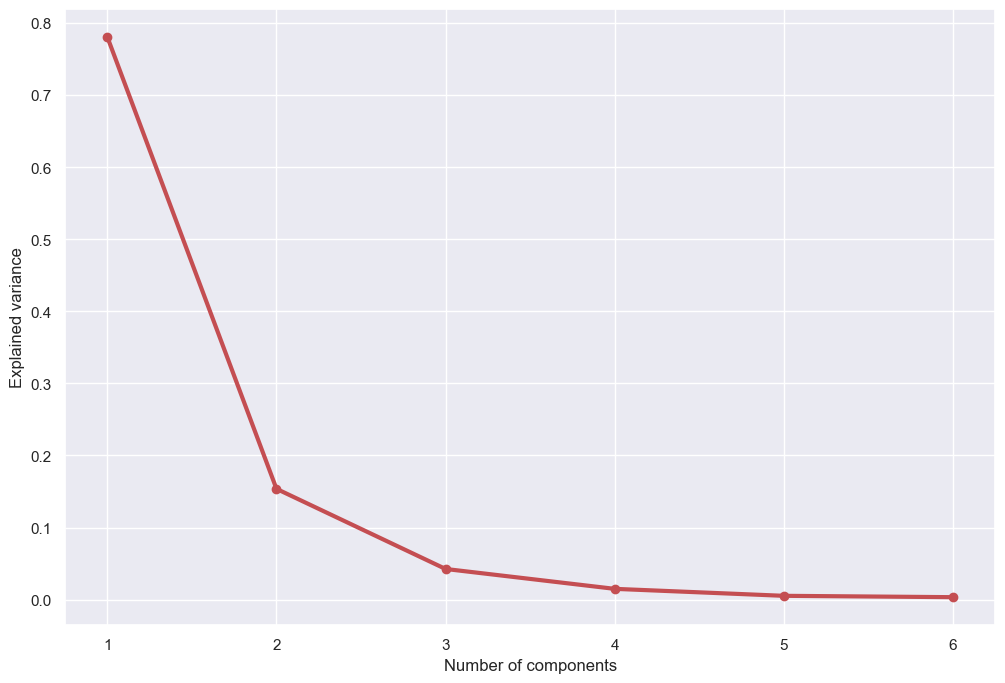

In [55]:

#Eigenvalues
Lambda = pca.explained_variance_ 
print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()


# Pareto Plot

In [56]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (78.0%)',
 '1': 'PC 2 (15.4%)',
 '2': 'PC 3 (4.2%)',
 '3': 'PC 4 (1.5%)',
 '4': 'PC 5 (0.5%)',
 '5': 'PC 6 (0.3%)'}

Text(0, 0.5, 'Cumulative explained variance')

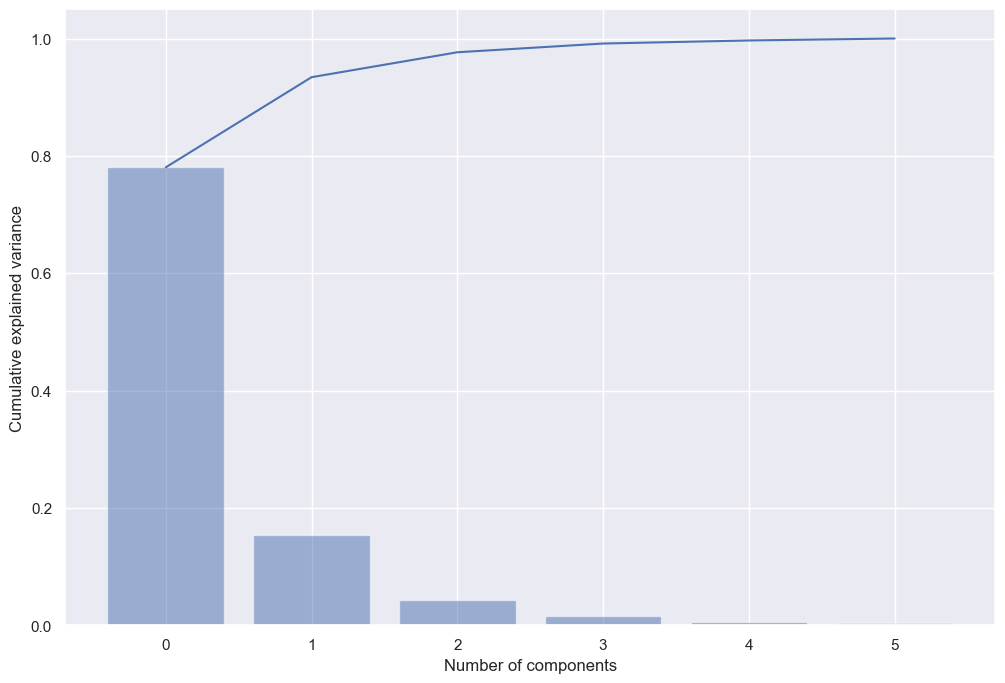

In [57]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

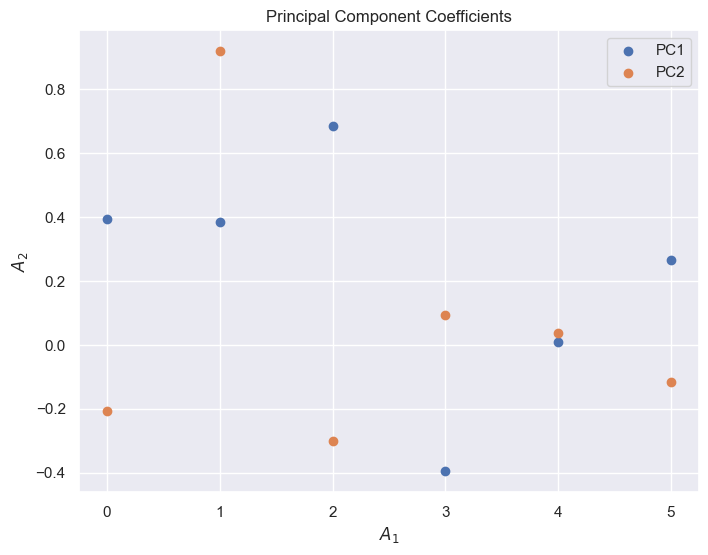

In [58]:
# Define the principal component coefficients
pc_coefficients = np.array(A)

# Plot the principal component coefficients
plt.figure(figsize=(8, 6))
for i in range(2):
    plt.scatter(range(pc_coefficients.shape[1]), pc_coefficients[i], label=f'PC{i+1}')
    
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
plt.title('Principal Component Coefficients')
plt.legend()
plt.grid(True)
plt.show()

# Splitting Data into 70-30 ratio

In [59]:

# Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(df, target , test_size=0.3, random_state=0)
Z_train, Z_test, zy_train, zy_test = train_test_split(Z, target, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], target, test_size=0.3, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(f'Train Dataset Size: {Z12_train.shape[0]}')
print(f'Test Dataset Size: {Z12_test.shape[0]}')

# Define the evaluation metric
scoring = ['f1_macro']

(105, 6)
(105,)
Train Dataset Size: 105
Test Dataset Size: 45


In [60]:
from pycaret.datasets import get_data
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from tabulate import tabulate
data = get_data('flower')

ModuleNotFoundError: No module named 'pycaret'

(105, 6)
(105,)
DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        16
           1      1.000     1.000     1.000        18
           2      1.000     1.000     1.000        11

    accuracy                          1.000        45
   macro avg      1.000     1.000     1.000        45
weighted avg      1.000     1.000     1.000        45



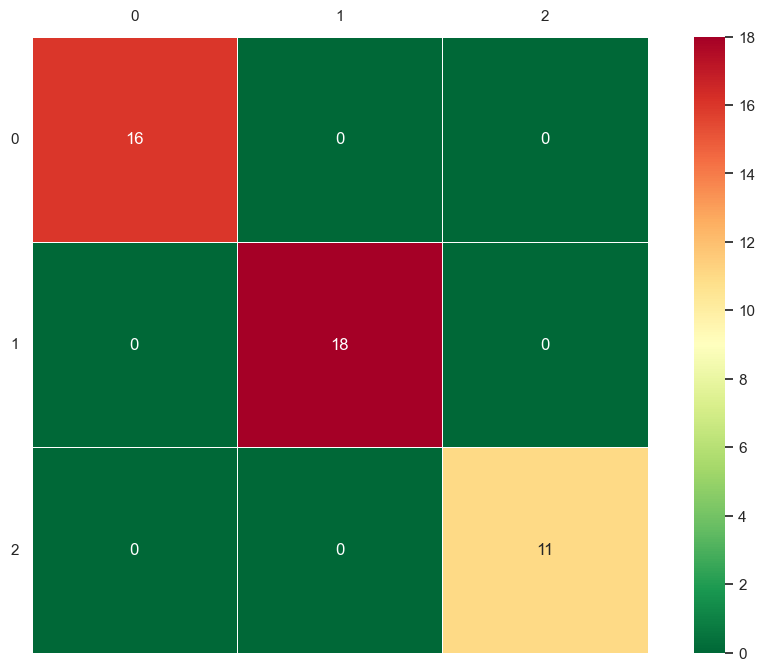

(105, 6)
(105,)
DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        16
           1      1.000     1.000     1.000        18
           2      1.000     1.000     1.000        11

    accuracy                          1.000        45
   macro avg      1.000     1.000     1.000        45
weighted avg      1.000     1.000     1.000        45



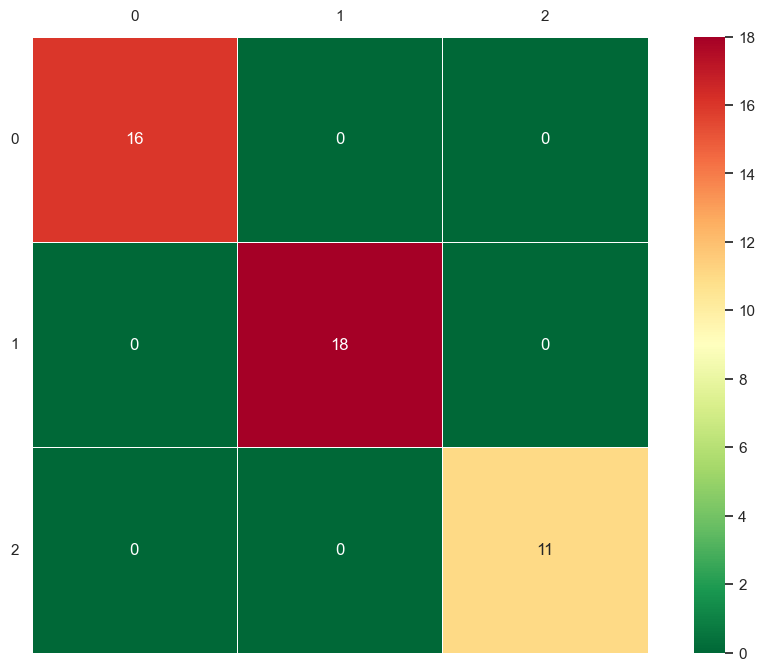

(105, 2)
(105,)
DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        16
           1      1.000     1.000     1.000        18
           2      1.000     1.000     1.000        11

    accuracy                          1.000        45
   macro avg      1.000     1.000     1.000        45
weighted avg      1.000     1.000     1.000        45



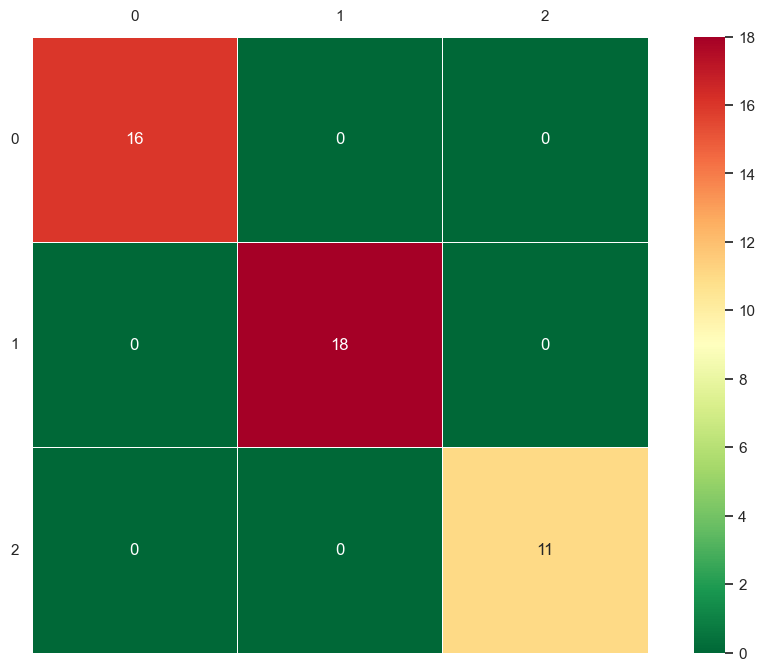

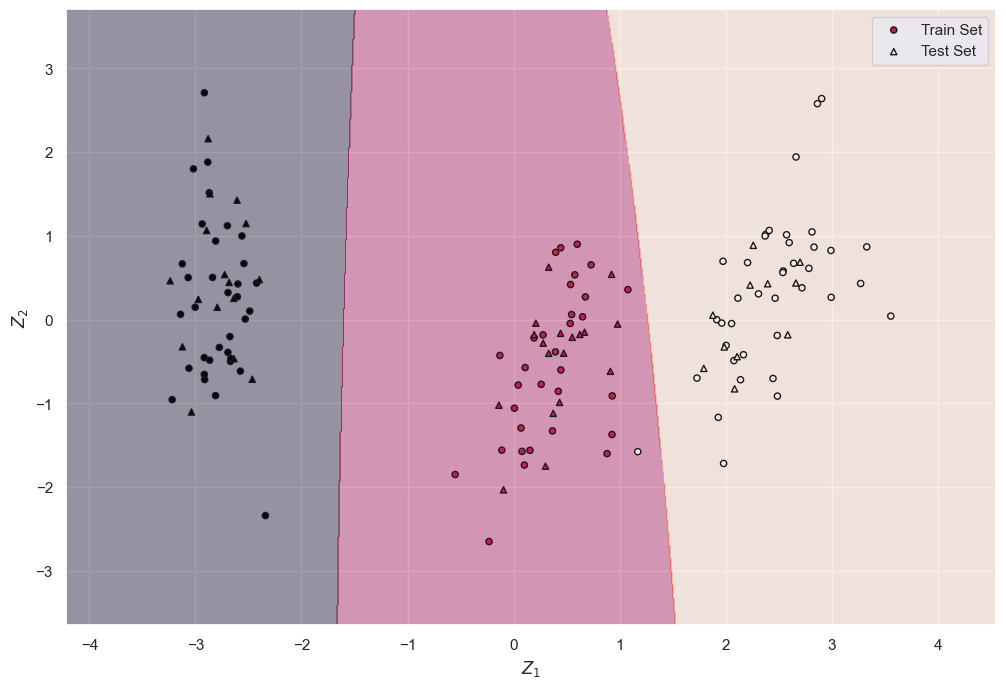

(array([], dtype=int64),)


In [ ]:
gnb = GaussianNB()

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  print(Xtr.shape)
  print(ytr.shape)
  gnb.fit(Xtr, ytr)
  y_pred = gnb.predict(Xtst)
  gnb_score = gnb.score(Xtst, ytst)
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  headers = ["Dataset", "Accuracy", "Precision", "Recall", "F1-score"]
  print(classification_report(ytst, y_pred, digits=3))


  # Confusion Matrix
  cm_gnb = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_gnb, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Naive Bayes Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    print(np.where(ytst != y_pred))
     

## K Nearest Neighbors (KNN)

Grid Search Results:
k_full_data: {'n_neighbors': 2}
k_Z: {'n_neighbors': 2}
k_Z12: {'n_neighbors': 2}
                                    0         1         2         3         4
knn_full_data fit_time       0.000529  0.000659  0.000450  0.000725  0.000469
knn_Z  fit_time              0.000172  0.000165  0.000221  0.000192  0.000188
knn_Z12 fit_time             0.000183  0.000193  0.000162  0.000161  0.000168
knn_full_data test_f1_macro  1.000000  1.000000  1.000000  1.000000  1.000000
knn_Z  test_f1_macro         1.000000  1.000000  1.000000  1.000000  1.000000
knn_Z12 test_f1_macro        0.955556  1.000000  1.000000  1.000000  1.000000

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        16
           1      1.000     1.000     1.000        18
           2      1.000     1.000     1.000        11

    accuracy                          1.000        45
   macro avg      1.000     1.000   

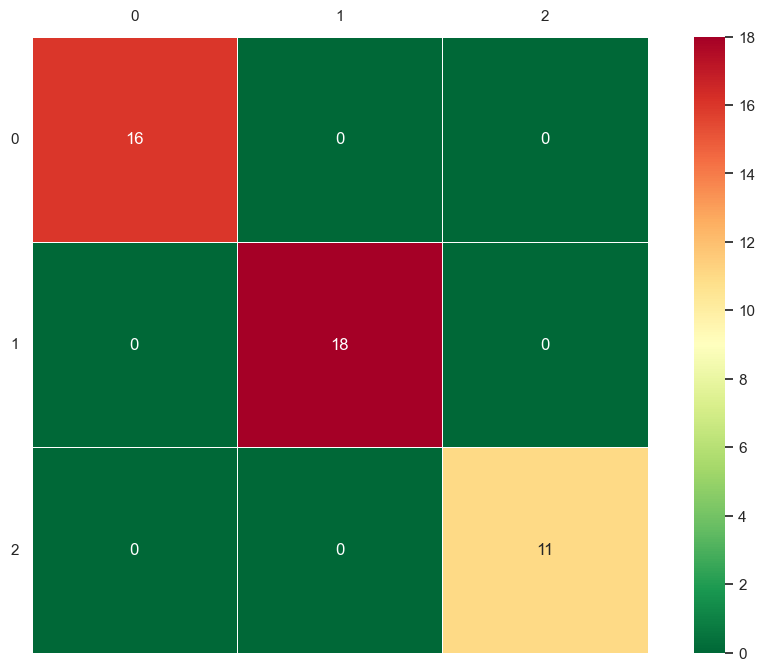

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        16
           1      1.000     1.000     1.000        18
           2      1.000     1.000     1.000        11

    accuracy                          1.000        45
   macro avg      1.000     1.000     1.000        45
weighted avg      1.000     1.000     1.000        45



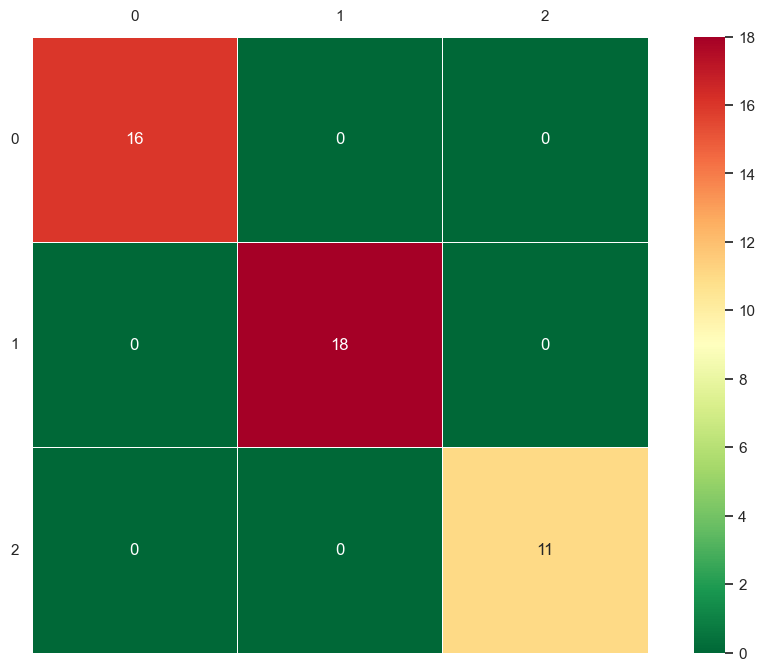

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        16
           1      1.000     1.000     1.000        18
           2      1.000     1.000     1.000        11

    accuracy                          1.000        45
   macro avg      1.000     1.000     1.000        45
weighted avg      1.000     1.000     1.000        45



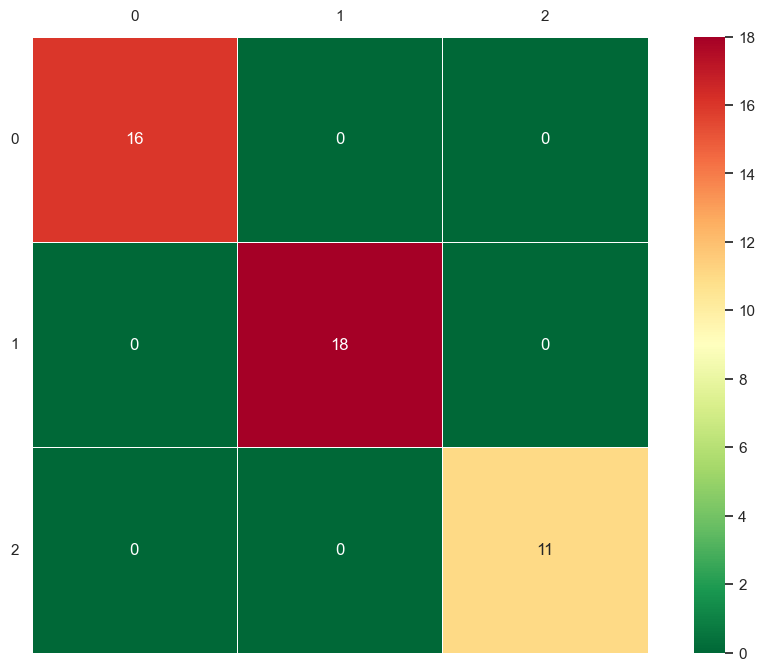

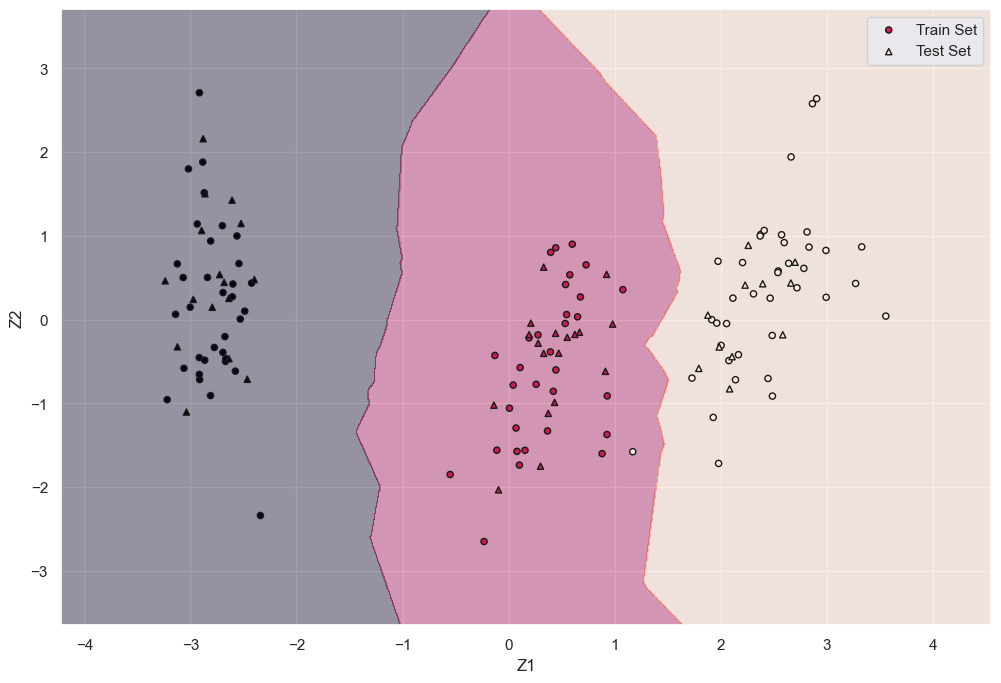

In [ ]:

# Hyperparameter grid search for k
param_grid = {'n_neighbors': [2, 4, 8, 16, 32]}
knn = KNeighborsClassifier()
#knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5) 
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Find best k
knn_full_data = grid_search.fit(X_train, y_train)
knn_Z = grid_search.fit(Z_train, zy_train)
knn_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best k
print('Grid Search Results:')
k_full_data = knn_full_data.best_params_
k_Z = knn_Z.best_params_
k_Z12 = knn_Z12.best_params_
print(f'k_full_data: {k_full_data}\nk_Z: {k_Z}\nk_Z12: {k_Z12}')

# Apply best k
knn = KNeighborsClassifier(n_neighbors=k_full_data.get('n_neighbors'))
scores_knn_full_data = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
scores_knn_Z = cross_validate(knn, Z_train, zy_train, cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(knn, Z12_train, z12y_train, cv=5, scoring=scoring)

knn_scores_dict={}
for i in ['fit_time','test_f1_macro']:
  knn_scores_dict["knn_full_data " + i ] = scores_knn_full_data[i]
  knn_scores_dict["knn_Z  " + i ] = scores_knn_Z[i]
  knn_scores_dict["knn_Z12 " + i ] = scores_knn_Z12[i]

knn_scores_data = pd.DataFrame(knn_scores_dict).T
#knn_scores_data['avgs'] = knn_scores_data.mean(axis=1)
print(f'{knn_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  knn.fit(Xtr, ytr)
  y_pred = knn.predict(Xtst)
  knn_score = knn.score(Xtst, ytst)
  #print(f'\nTest Set Accuracy: {knn_score:.3f}')
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))
  
   # Confusion Matrix
  cm_knn = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_knn, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('KNN Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    # print(np.where(ytst != y_pred))
  



## Decision Tree

Grid Search Results:
depth_full_data: {'max_depth': 2}
depth_Z: {'max_depth': 2}
depth_Z12: {'max_depth': 2}
                                   0         1         2         3         4
dt_full_data fit_time       0.000772  0.000496  0.000679  0.000513  0.000476
dt_Z  fit_time              0.000235  0.000217  0.000212  0.000210  0.000374
dt_Z12 fit_time             0.000209  0.000193  0.000182  0.000182  0.000180
dt_full_data test_f1_macro  1.000000  1.000000  1.000000  1.000000  1.000000
dt_Z  test_f1_macro         0.955556  1.000000  1.000000  0.950089  1.000000
dt_Z12 test_f1_macro        0.955556  1.000000  1.000000  0.950089  1.000000

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        16
           1      1.000     1.000     1.000        18
           2      1.000     1.000     1.000        11

    accuracy                          1.000        45
   macro avg      1.000     1.000    

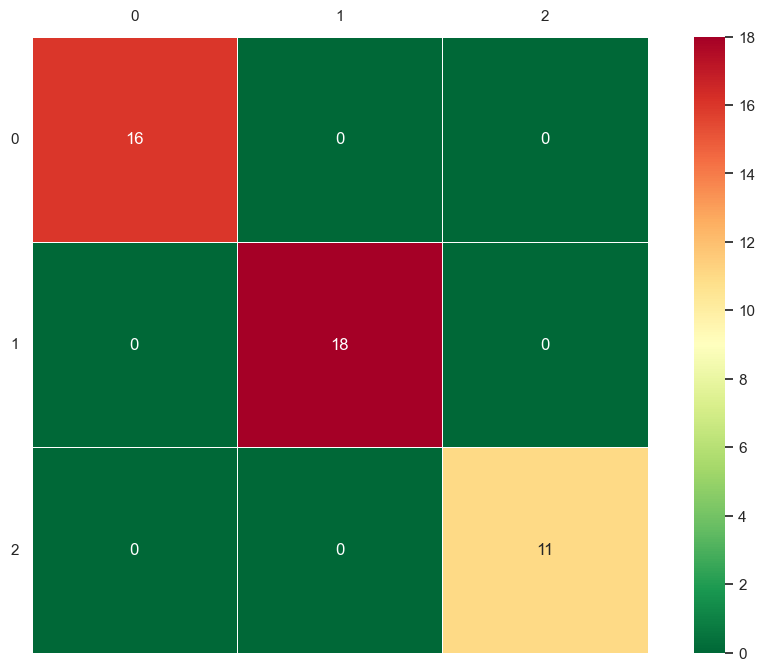

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        16
           1      1.000     1.000     1.000        18
           2      1.000     1.000     1.000        11

    accuracy                          1.000        45
   macro avg      1.000     1.000     1.000        45
weighted avg      1.000     1.000     1.000        45



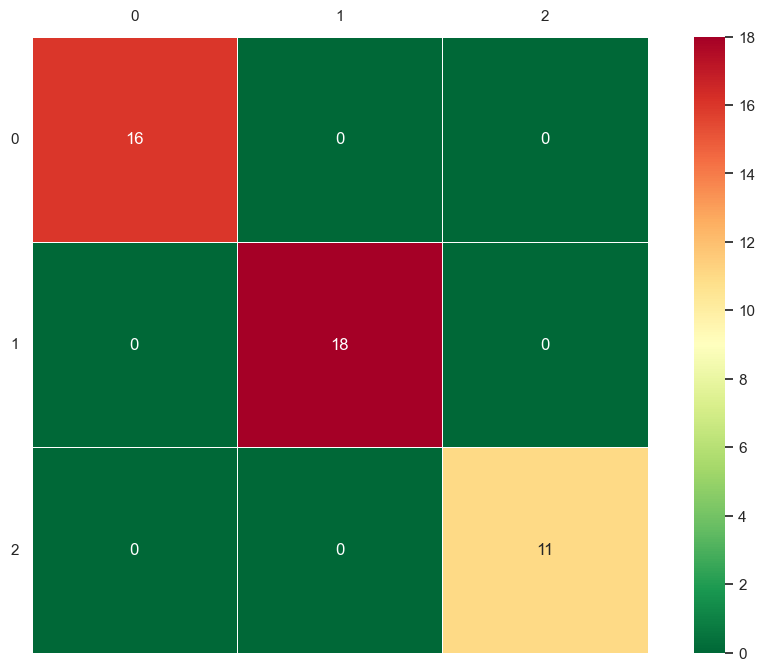

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        16
           1      1.000     1.000     1.000        18
           2      1.000     1.000     1.000        11

    accuracy                          1.000        45
   macro avg      1.000     1.000     1.000        45
weighted avg      1.000     1.000     1.000        45



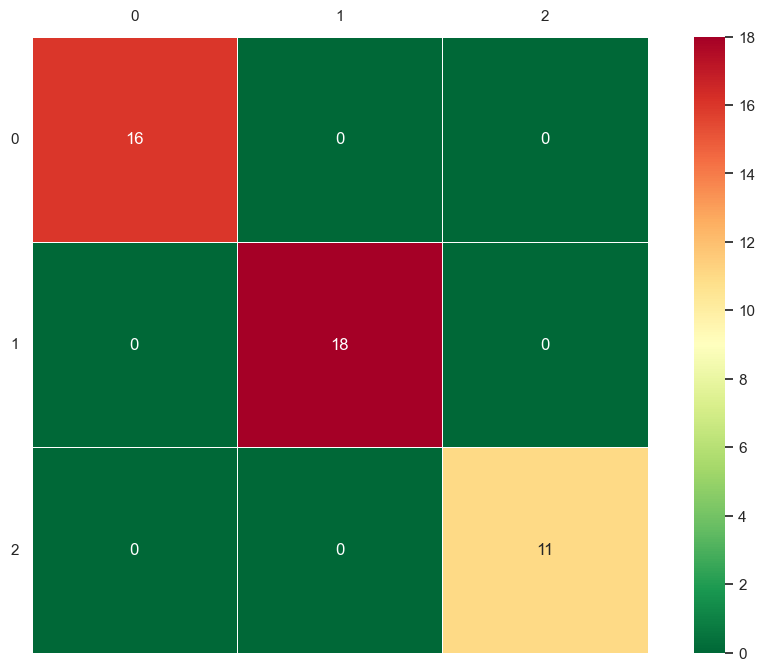

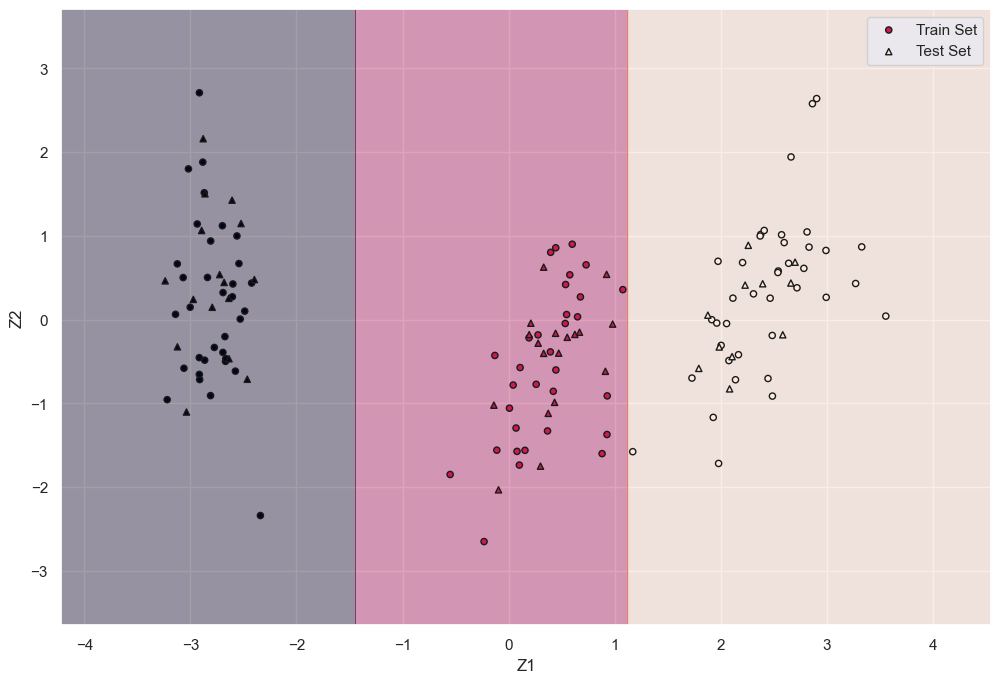

In [ ]:
# Hyperparameter search for DT depth
param_grid = {'max_depth': [2, 4, 8, 16, 32, 64]}
dt = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Find best depth
dt_full_data = grid_search.fit(X_train, y_train)
dt_Z = grid_search.fit(Z_train, zy_train)
dt_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best tree depth
print('Grid Search Results:')
depth_full_data = dt_full_data.best_params_
depth_Z = dt_Z.best_params_
depth_Z12 = dt_Z12.best_params_
print(f'depth_full_data: {depth_full_data}\ndepth_Z: {depth_Z}\ndepth_Z12: {depth_Z12}')

# Apply best k
dt = DecisionTreeClassifier(max_depth=depth_full_data.get('max_depth'))
scores_dt_full_data = cross_validate(dt, X_train, y_train, cv=5, scoring=scoring)
scores_dt_Z = cross_validate(dt, Z_train, zy_train, cv=5, scoring=scoring)
scores_dt_Z12 = cross_validate(dt, Z12_train, z12y_train, cv=5, scoring=scoring)

dt_scores_dict={}
for i in ['fit_time', 'test_f1_macro']:
  dt_scores_dict["dt_full_data " + i ] = scores_dt_full_data[i]
  dt_scores_dict["dt_Z  " + i ] = scores_dt_Z[i]
  dt_scores_dict["dt_Z12 " + i ] = scores_dt_Z12[i]

dt_scores_data = pd.DataFrame(dt_scores_dict).T
#dt_scores_data['avgs'] = dt_scores_data.mean(axis=1)
print(f'{dt_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  dt.fit(Xtr, ytr)
  y_pred = dt.predict(Xtst)
  dt_score = dt.score(Xtst, ytst)
  #print(dt_score)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))
   # Confusion Matrix
  cm_dt = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_dt, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Decision Tree Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()
     
  

## ROC Curves

DATASET: FULL DATA


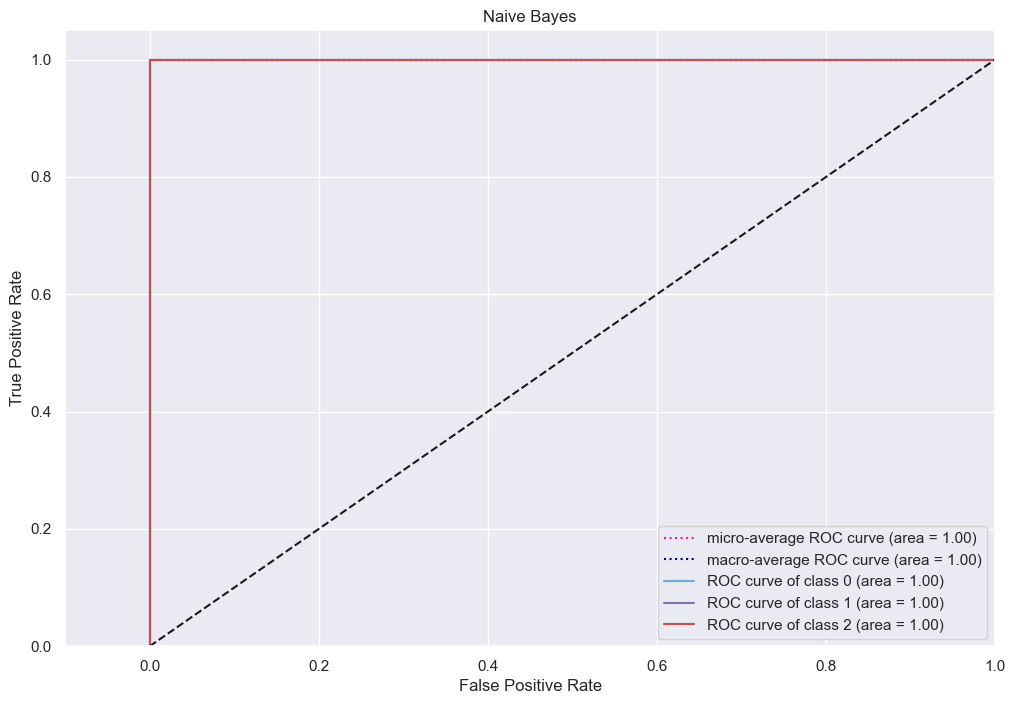

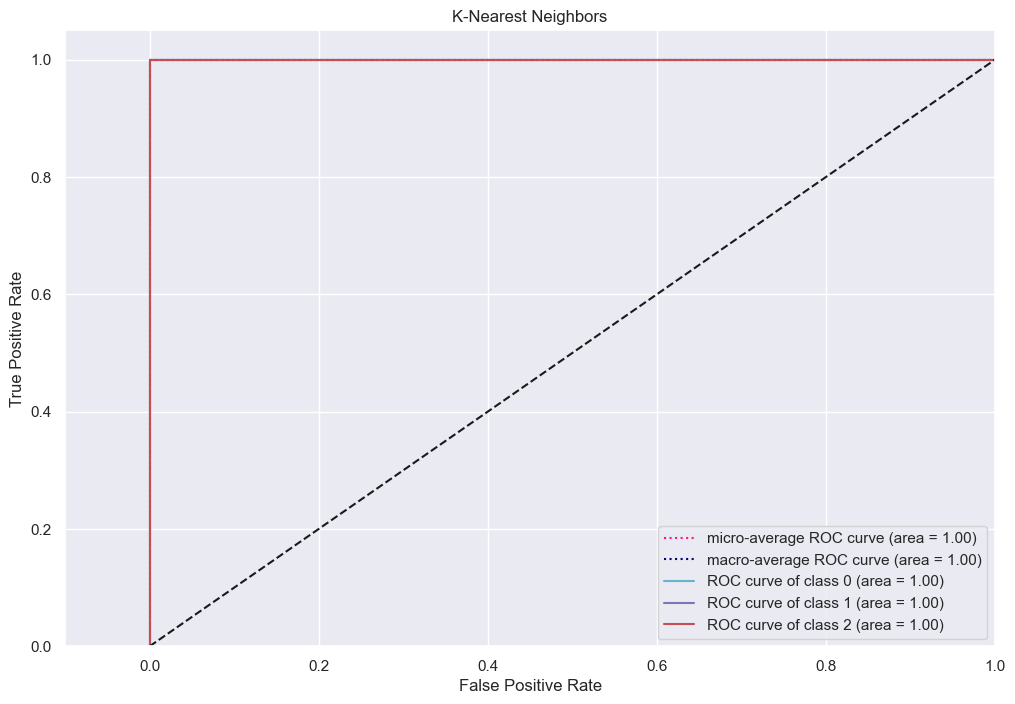

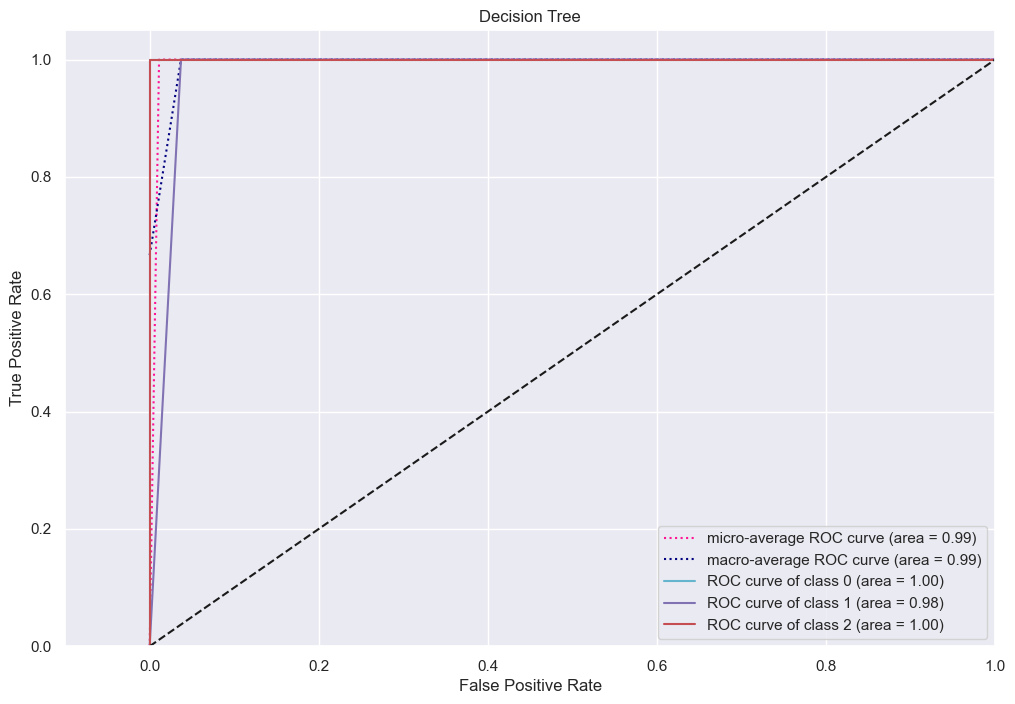

DATASET: Z


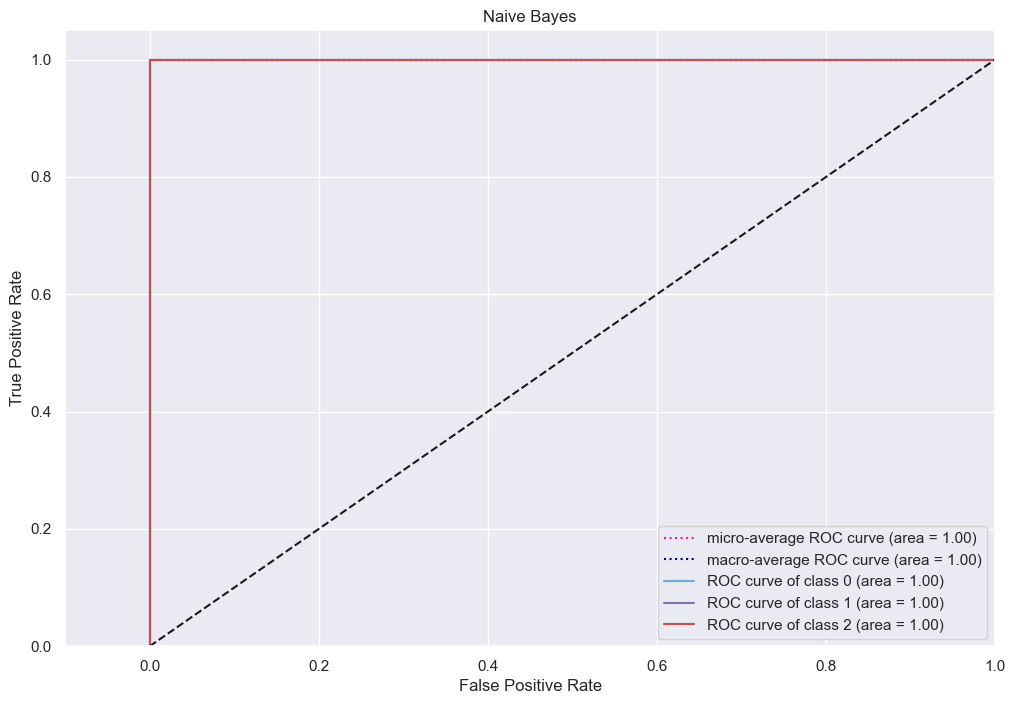

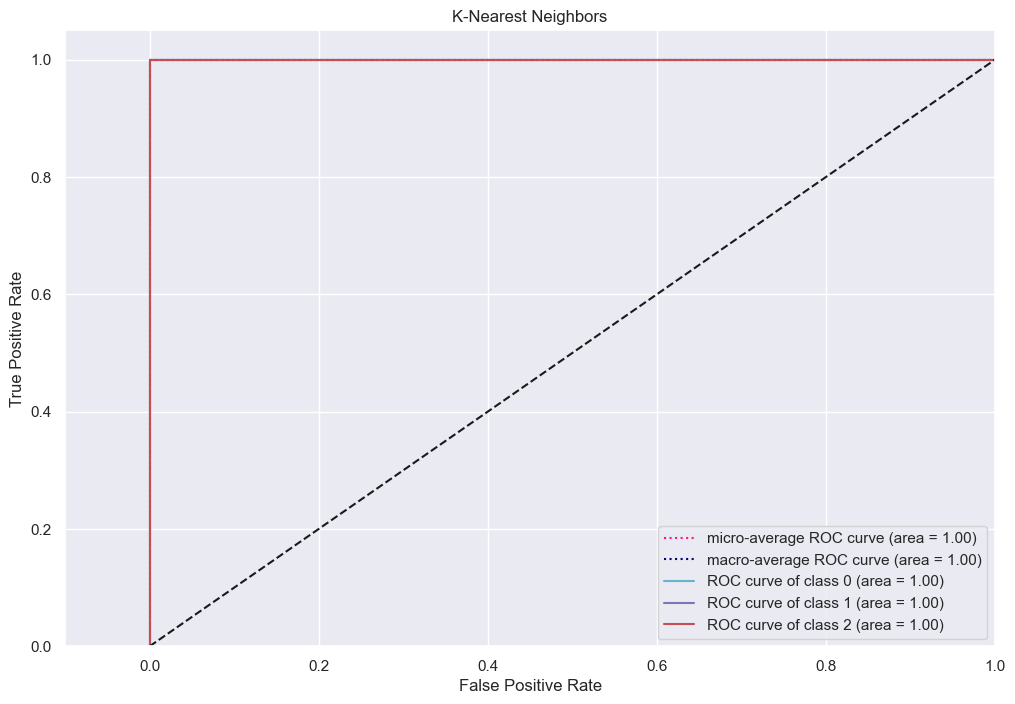

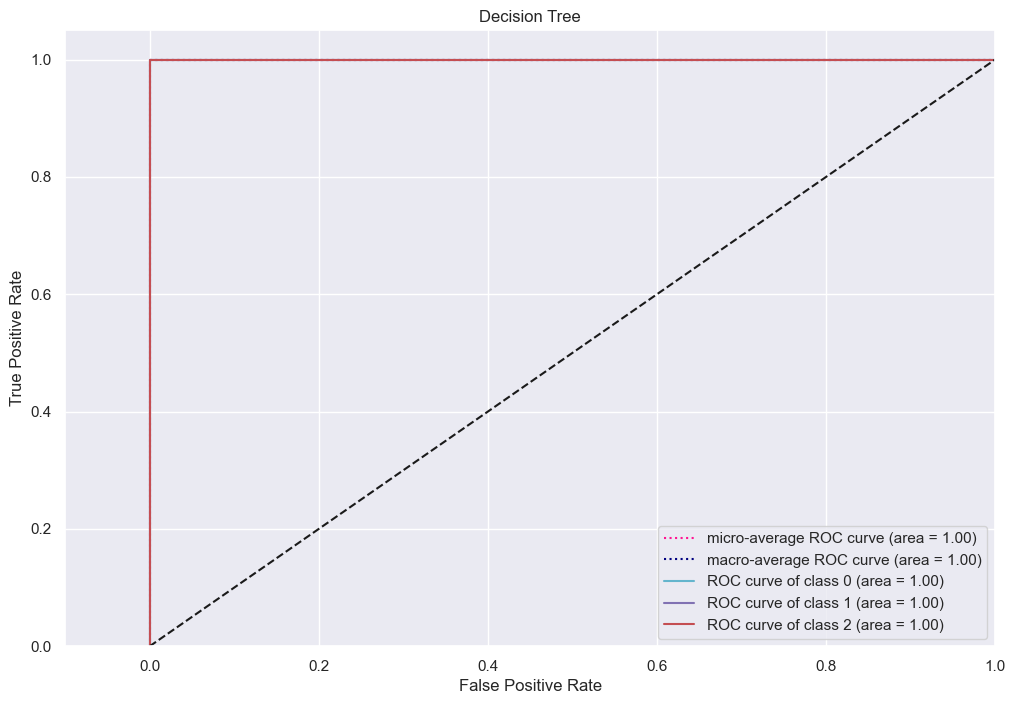

DATASET: Z12


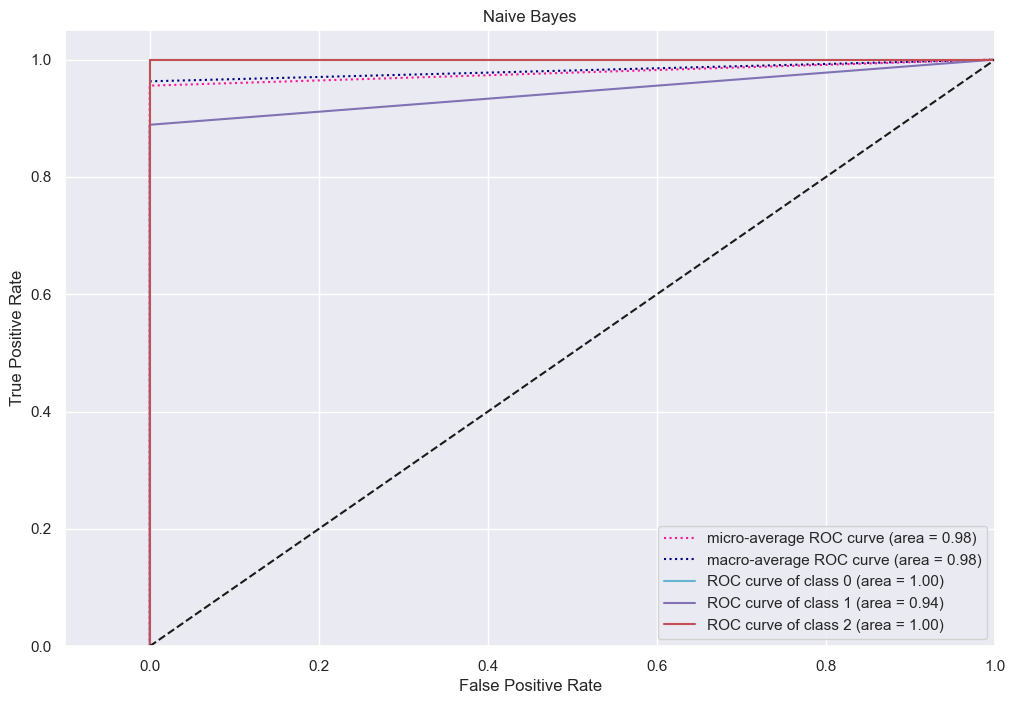

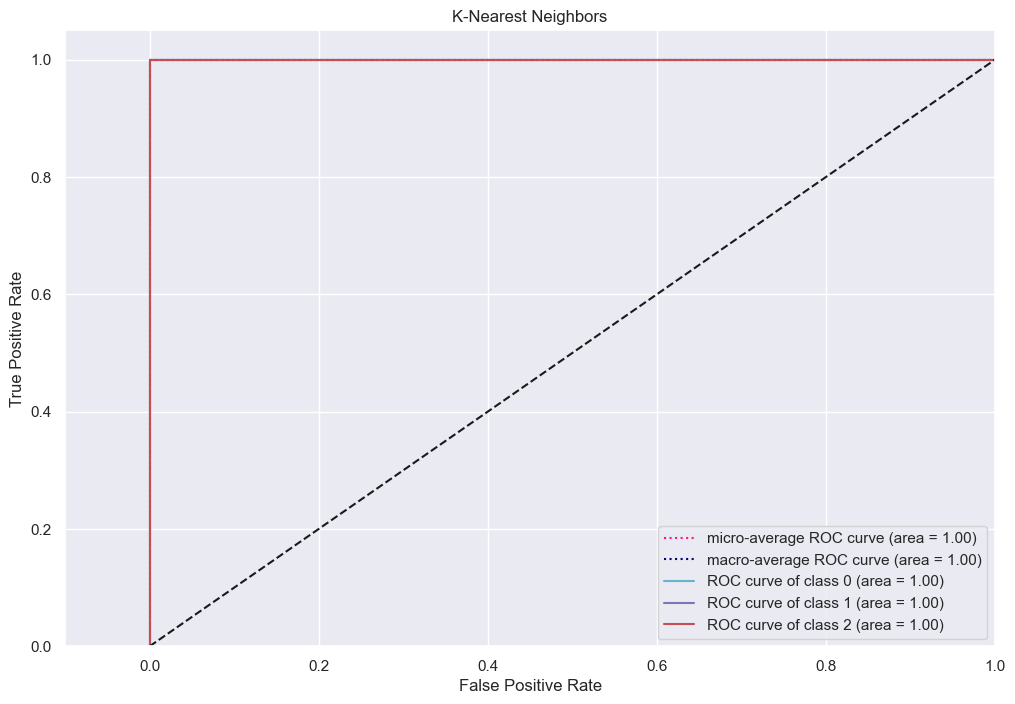

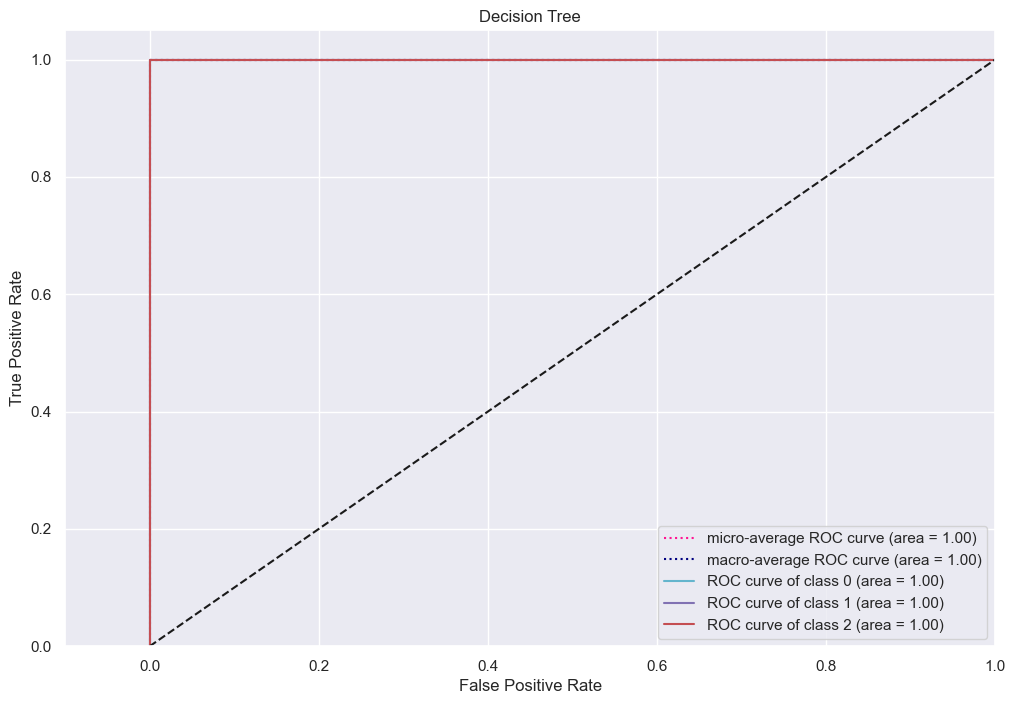

In [ ]:
#ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, X_tr, y_tr, X_tst, y_tst) in enumerate(datasets):
  # Binarize the labels
  y_train = label_binarize(y_tr, classes=[0, 1, 2])
  y_test = label_binarize(y_tst, classes=[0, 1, 2])
  n_classes = y_train.shape[1]
  print(f'DATASET: {name}')

  list_algos = [gnb, knn, dt]
  algo_name = ['Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree']
  for i, (algo, algo_name) in enumerate(zip(list_algos, algo_name)):
    classifier = OneVsRestClassifier(algo)
    y_pred = classifier.fit(X_tr, y_train).predict(X_tst)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i], drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel(), drop_intermediate=False)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
        
 # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig, ax = plt.subplots()

    plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})', color="deeppink", linestyle=':')
    plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})', color="navy", linestyle=':')

    colors = cycle(['c', 'm', 'r'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i], color=color,label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{algo_name}')
    plt.legend()
    plt.show()